Это **пятый** проект на Яндекс.Практикуме. <br>
Все выводы данных я либо удалил, либо закомментировал, в связи с требованиями правообладателей. <br>
Я специально не совершенствовал код, чтобы была возможность увидеть рост от проекта к проекту.

БОльшая часть данной работы была сделана с помощью SQL в тренажере Яндекс.Практикума.

# Аналитика в авиакомпании
---

**Наша задача в данной работе:** получить данные из SQL-запросов, построить графики количества рейсов от городов и моделей самолётов и сделать выводы.

## Аналитика средствами Python
* импортировать файлы;
* изучить данные в них;
* проверить типы данных на корректность;
* выбрать топ-10 городов по количеству рейсов;
* построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
* сделать выводы по каждому из графиков, пояснить результат.

###  Импортируем и изучим файлы, а также проверим типы данных на корректность:

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
models_and_amount = pd.read_csv('/datasets/query_1.csv')
city_and_average = pd.read_csv('/datasets/query_3.csv')

In [4]:
models_and_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
models_and_amount

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


В таблице первого запроса  `models_and_amount `,  содержащей информацию о модели самолёта и количестве рейсов за сентябрь 2018 **нет пропусков и все типы данных верны**.

In [6]:
city_and_average.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


В таблице третьего запроса  `city_and_average `,  содержащей информацию о городе и среднем количестве рейсов, прибывающих в город за август 2018 **нет пропусков и все типы данных верны**. Количество рейсов, по логике, должно быть целочисленным и иметь тип **int**, но мы оставим его дробным и будем про это помнить и иметь это в виду.

In [6]:
city_and_average['average_flights'] = city_and_average['average_flights'].astype('float16')
print(city_and_average['average_flights'].dtype)

float16


### Выберем топ-10 городов по количеству рейсов:

In [7]:
models_and_amount_top_10 = models_and_amount.sort_values(by = 'flights_amount', ascending = False).reset_index(drop = True)
models_and_amount_top_10

,model,flights_amount
0,Cessna 208 Caravan,4557
1,Bombardier CRJ-200,4446
2,Sukhoi SuperJet-100,4185
3,Airbus A321-200,960
4,Boeing 737-300,630
5,Airbus A319-100,607
6,Boeing 767-300,600
7,Boeing 777-300,300


In [9]:
city_and_average_top_10 = city_and_average.sort_values(by = 'average_flights', ascending = False).reset_index(drop = True).head(10)
city_and_average_top_10

,city,average_flights
0,Москва,129.750000
1,Санкт-Петербург,31.156250
2,Новосибирск,17.328125
3,Красноярск,11.578125
4,Екатеринбург,11.320312
5,Ростов-на-Дону,10.195312
6,Пермь,10.132812
7,Брянск,10.000000
8,Сочи,9.609375
9,Ульяновск,9.578125


### Построим графики и сделаем выводы:

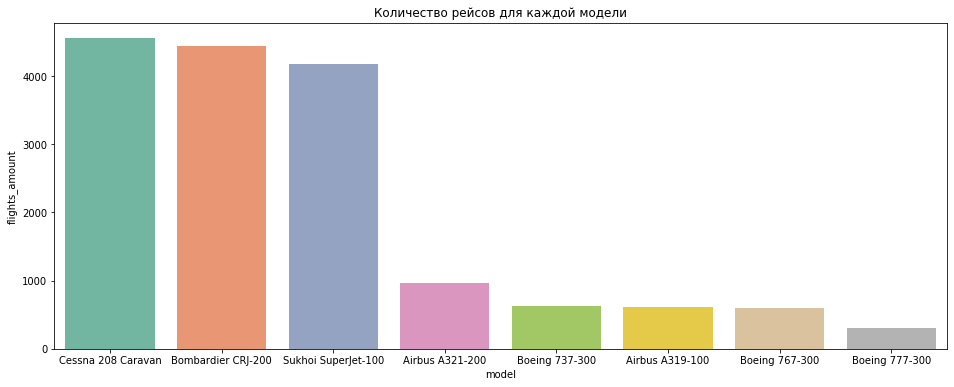

In [10]:
ax = plt.figure(figsize = (16,6))
ax = sns.barplot(x = models_and_amount_top_10['model'], y = models_and_amount_top_10['flights_amount'], palette="Set2");
ax.set_title('Количество рейсов для каждой модели');

**`Cessna 208 Caravan`,`Bombardier CRJ-200`** и **`Sukhoi SuperJet-100`** имеют примерно одинаково много рейсов (>4000), остальные модели встречаются значительно реже и не превышают 1000 рейсов. Такой большой разрыв связан с тем, что первые 3 самолёта используются чаще, имея меньшую вместимость пассажиров и дальность полёта нежели остальные.

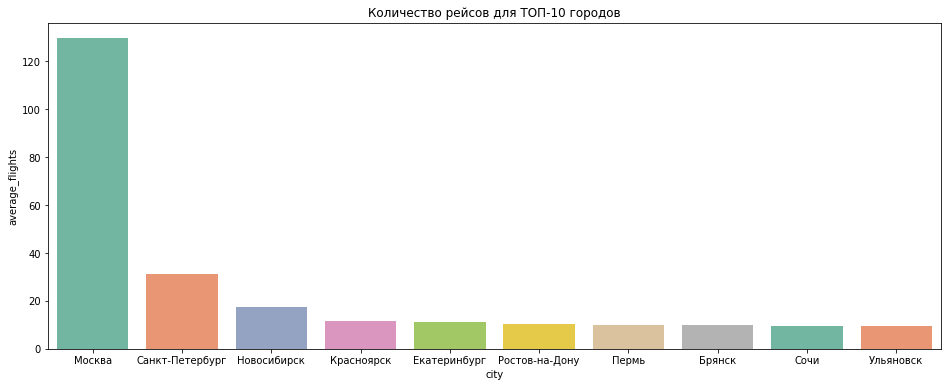

In [10]:
ax = plt.figure(figsize = (16,6))
ax = sns.barplot(x = city_and_average_top_10['city'], y = city_and_average_top_10['average_flights'], palette="Set2");
ax.set_title('Количество рейсов для ТОП-10 городов');

**`Москва`** имеет наибольшее количество рейсов из ТОП-10 городов - 129, затем идёт **`Санкт-Петербург`** и его 31 рейс, на третьем месте - **`Новосибирск`** с 17-ю ежедневными рейсами, остальные города из ТОП-10 имеют примерно одинаковые результаты (~10). 

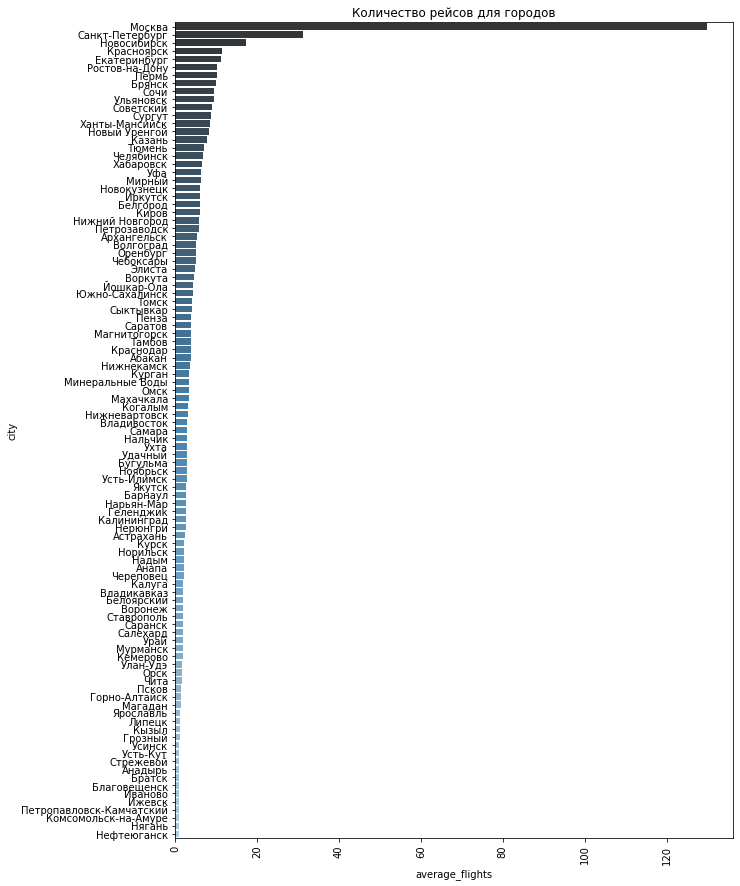

In [23]:
ax = plt.figure(figsize = (10,15))
city_and_average = city_and_average.sort_values(by = 'average_flights', ascending = False).reset_index(drop = True)
ax = sns.barplot(y = city_and_average['city'], x = city_and_average['average_flights'], palette="Blues_d");
ax.set_title('Количество рейсов для городов');
plt.xticks(rotation='vertical');

На графике нагляднее видно, насколько сильно **`Москва, Санкт-Перетбург и Новосибирск`** превышают по количеству ежедневных рейсов остальные города.

### Вывод:

Данные были успешно импортированы, ошибок обнаружено не было. <br>
Диаграмма **количества рейсов от модели самолёта** выявила 3-х явных фаворитов: **`Cessna 208 Caravan`,`Bombardier CRJ-200`** и **`Sukhoi SuperJet-100`**, самолёты предназначенные на короткие дистанцие и малое количество пассажиров, соответственно имеющие больше рейсов, чем остальные модели.
<br> Диаграмма **количества рейсов от города**, в который прибывают самолёты показала предсказуемый результат: сильно лидирующую Москву, затем Санкт-Петербург и Новосибирск, остальные города имеют намного меньшее количество рейсов.